# Covid 19 Project

Data set - https://drive.google.com/drive/folders/1ByRa_qP3LgDes1Ec1CsPRhv6sgVm_Ynv?usp=sharing

In [ ]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading dataset
df = pd.read_csv('https://drive.google.com/drive/folders/1ByRa_qP3LgDes1Ec1CsPRhv6sgVm_Ynv?usp=sharing')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# Shape of dataset
df.shape

(49068, 10)

In [ ]:
# Checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
# Renaming correct columns
df.rename(columns={'Province/State':'State',
           'Country/Region':'Country'}, inplace = True)
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# getting value count of Date field
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-05-30,261
2020-05-21,261
2020-05-22,261
2020-05-23,261
...,...
2020-03-26,261
2020-03-27,261
2020-03-28,261


we can see that max date will be **2020-07-27**

In [ ]:
# check max date
df['Date'].max()

'2020-07-27'

In [ ]:
# poulating rows with max date in top
top = df[df['Date'] == '2020-07-27']
top.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [ ]:
# Grouping all rows absed on country
top.groupby(by='Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
# Populating all confirmed case in confirmed dataset
confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


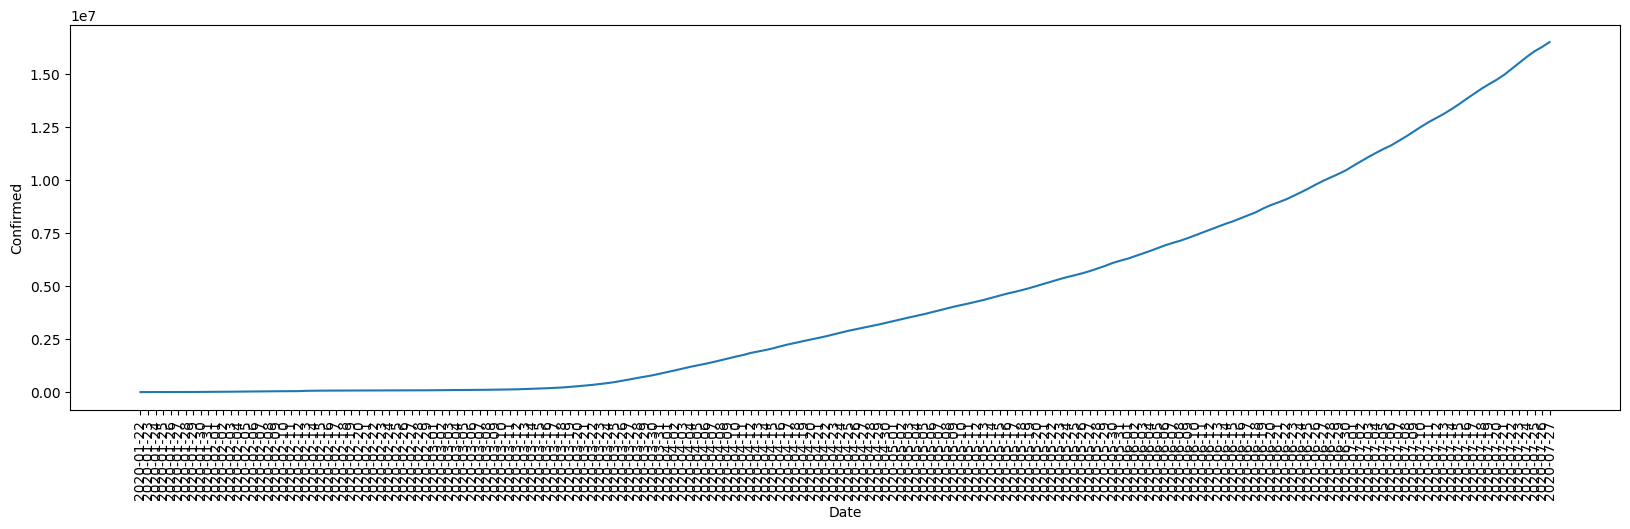

In [ ]:
# Visualizing confirmed case
plt.figure(figsize = (20,5))
sns.lineplot(data=confirmed, x='Date', y='Confirmed')
plt.xticks(rotation=90)
plt.show()

# Top 10 countries with the most recovered cases

In [ ]:
top_10_recovered = df.groupby(by='Country')['Recovered'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_recovered

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


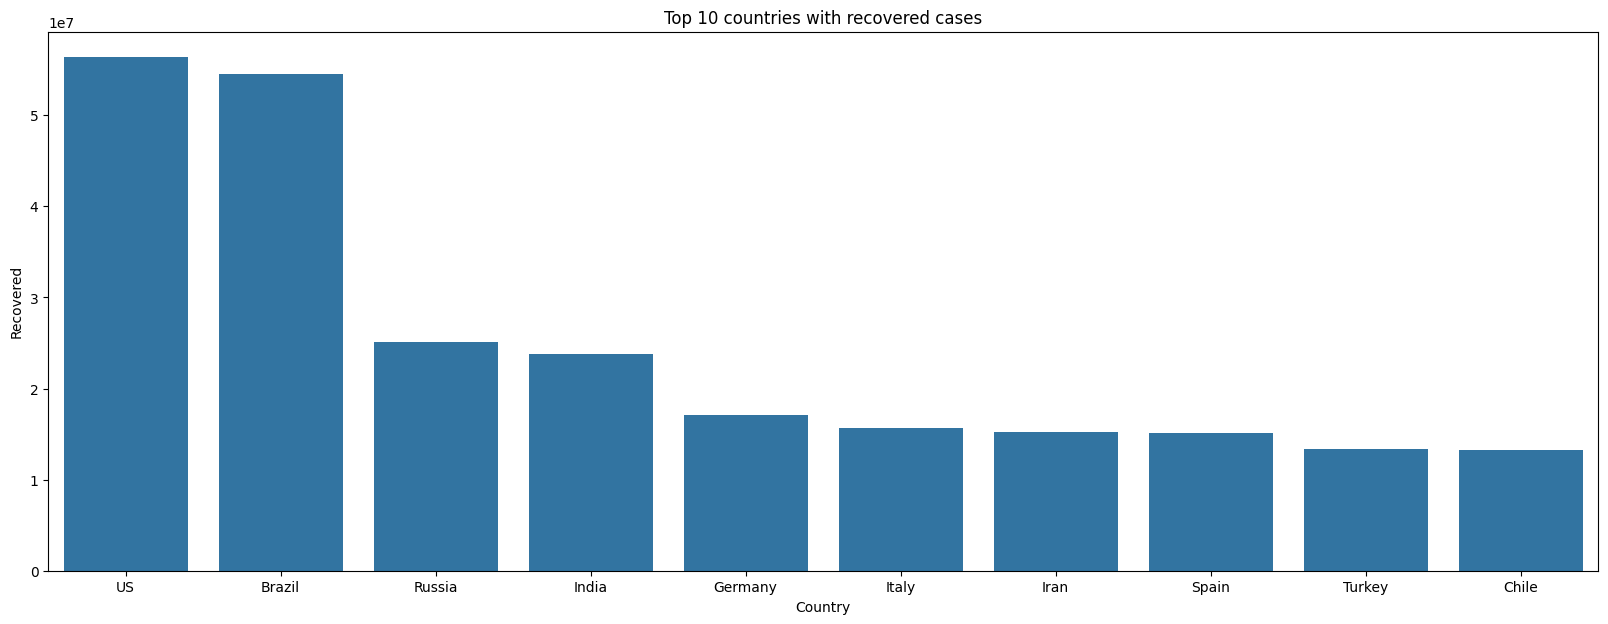

In [ ]:
# Visualizing recovered case
plt.figure(figsize = (20,7))
sns.barplot(data = top_10_recovered, x = 'Country', y='Recovered')
plt.title('Top 10 countries with recovered cases')
plt.show()

# Top 10 countries with deaths

In [ ]:
top_10_deaths = df.groupby(by='Country')['Deaths'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_deaths

,Country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


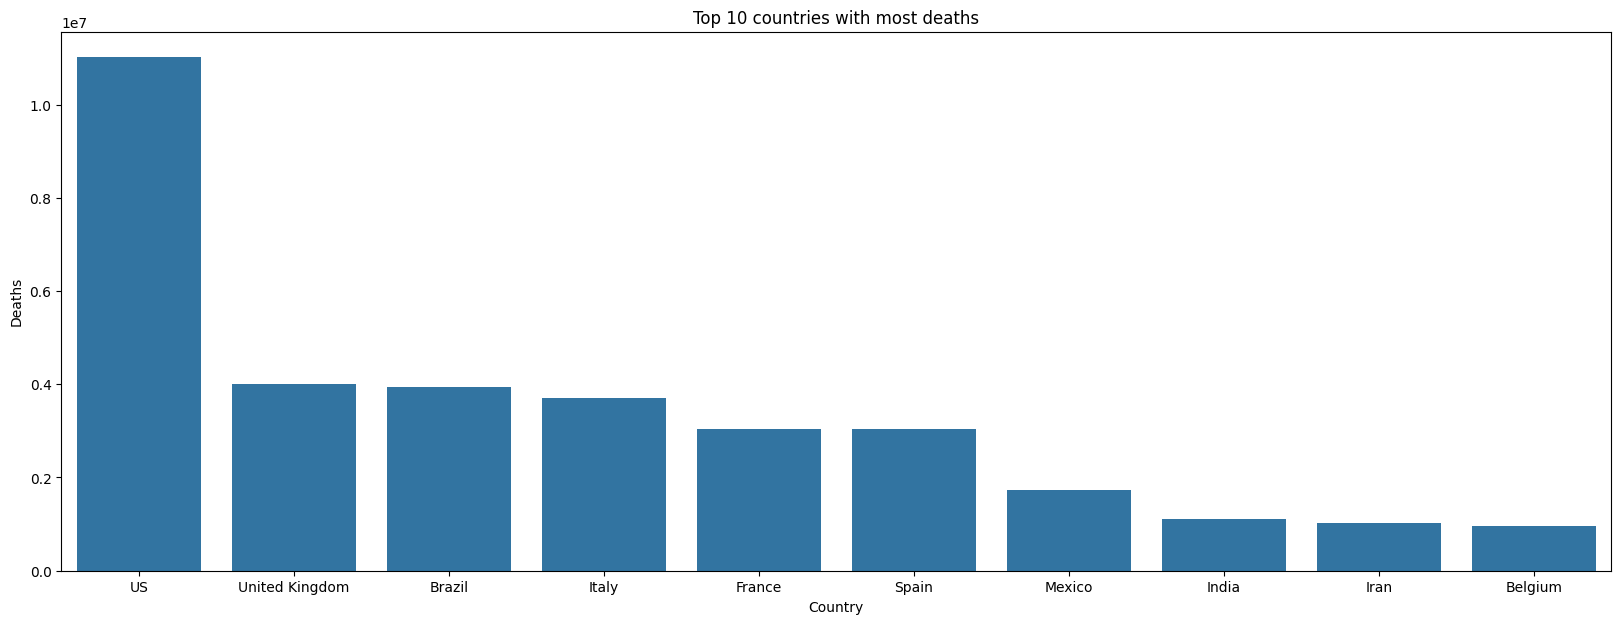

In [ ]:
# Visualizing deaths case
plt.figure(figsize = (20,7))
sns.barplot(data = top_10_deaths, x = 'Country', y = 'Deaths')
plt.title('Top 10 countries with most deaths')
plt.show()

# Top 10 countries with most active cases

In [ ]:
top_10_active = df.groupby(by='Country')['Active'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


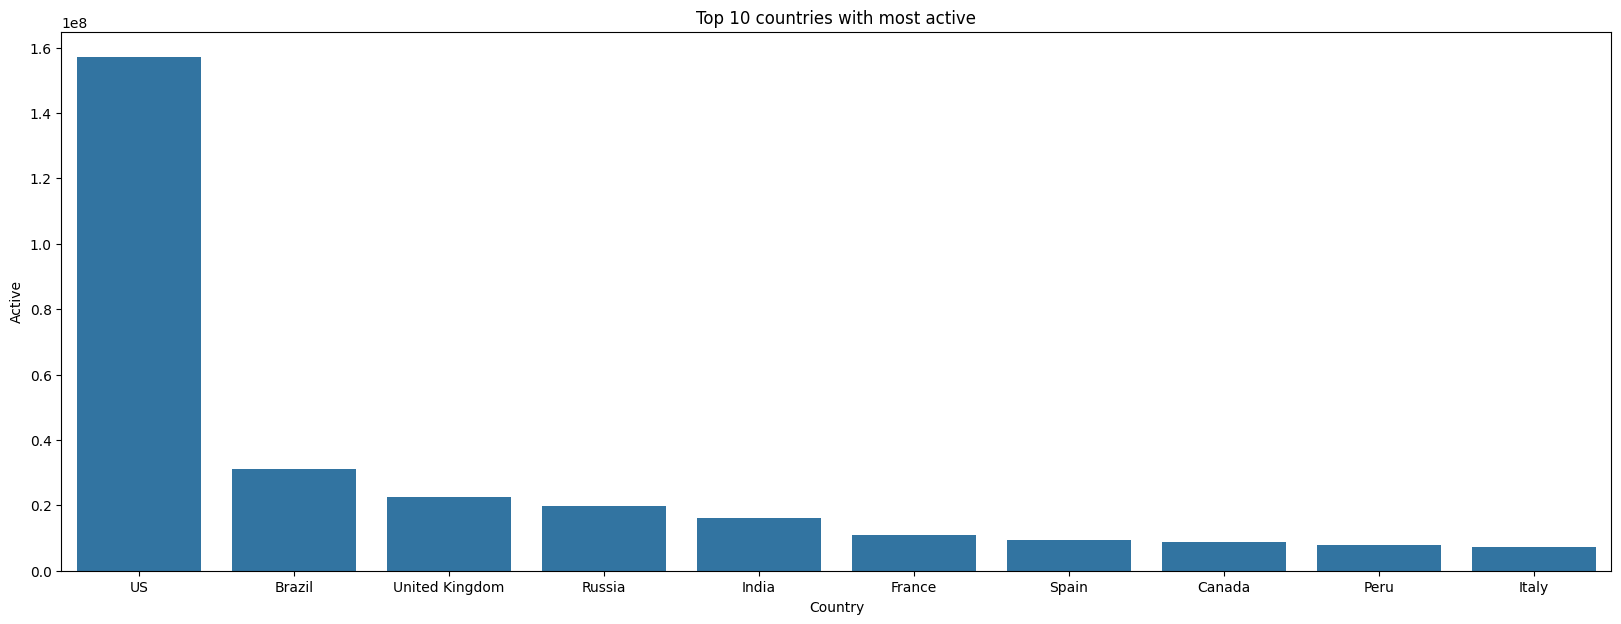

In [ ]:
# Visualizing active case
plt.figure(figsize = (20,7))
sns.barplot(data = top_10_active, x = 'Country', y = 'Active')
plt.title('Top 10 countries with most active')
plt.show()

# Country Based Analysis

1st **US**

2nd **China**

3rd **India**

In [ ]:
# Creating US dataset which have country as US
US = df[df['Country'] == 'US']
US.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
US = US.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [ ]:

# Creating China dataset which have country as China
China = df[df['Country'] == 'China']
China.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [ ]:
China = China.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
China

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [ ]:
# Creating India dataset which have country as India
India = df[df['Country'] == 'India']
India.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [ ]:
India = India.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
India


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


# Compare these countries on the basis of **Recovered** cases

Text(0, 0.5, 'No. of Recovered')

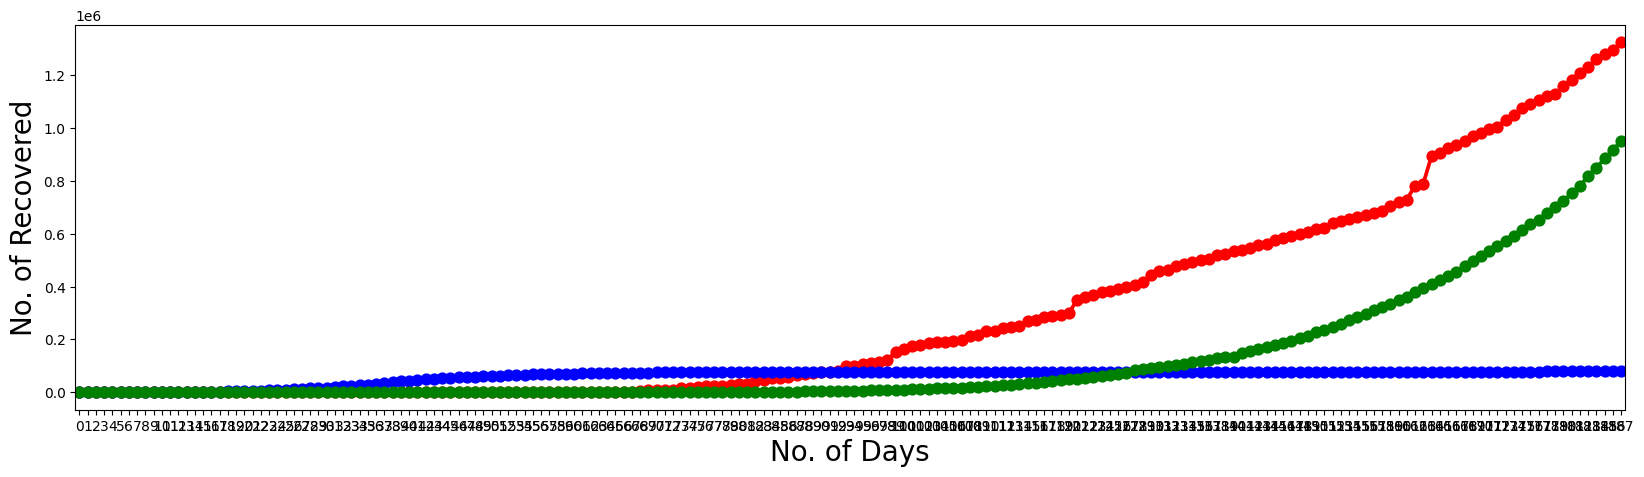

In [ ]:
# Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x=US.index, y = US.Recovered, color = 'Red')
sns.pointplot(x=China.index, y=China.Recovered, color = 'Blue')
sns.pointplot(x=India.index, y=India.Recovered, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

# Compare these countries on the basis of **Deaths** cases

Text(0, 0.5, 'No. of Recovered')

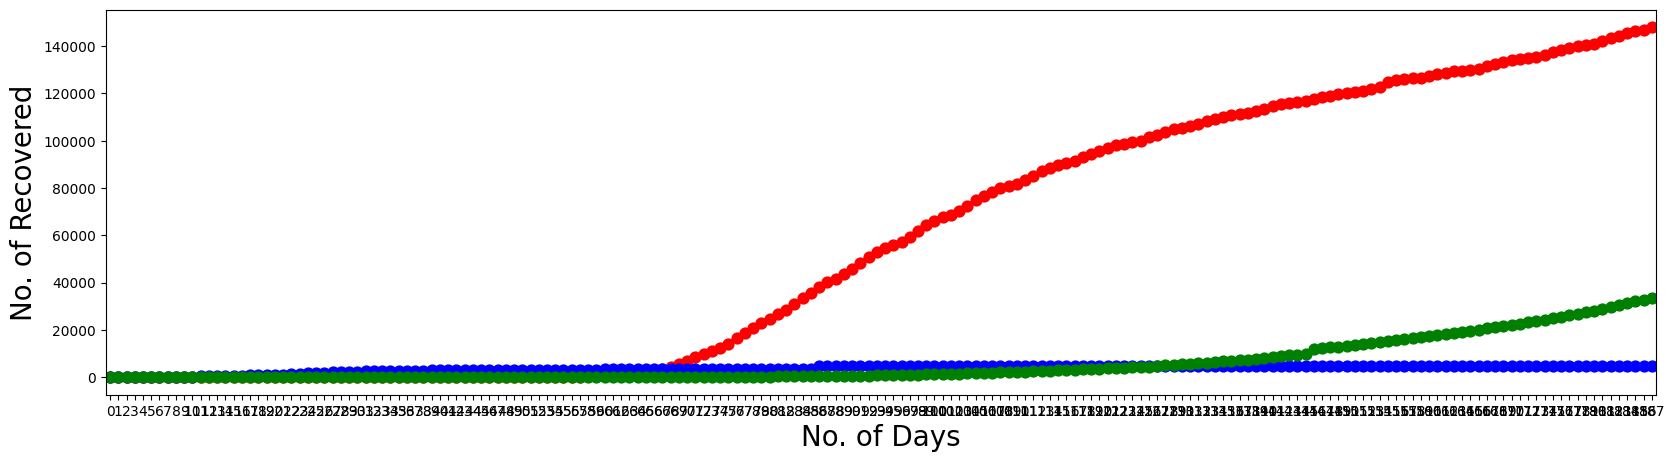

In [ ]:
# Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x=US.index, y = US.Deaths, color = 'Red')
sns.pointplot(x=China.index, y=China.Deaths, color = 'Blue')
sns.pointplot(x=India.index, y=India.Deaths, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

# Compare these countries on the basis of **Active** cases

Text(0, 0.5, 'No. of Recovered')

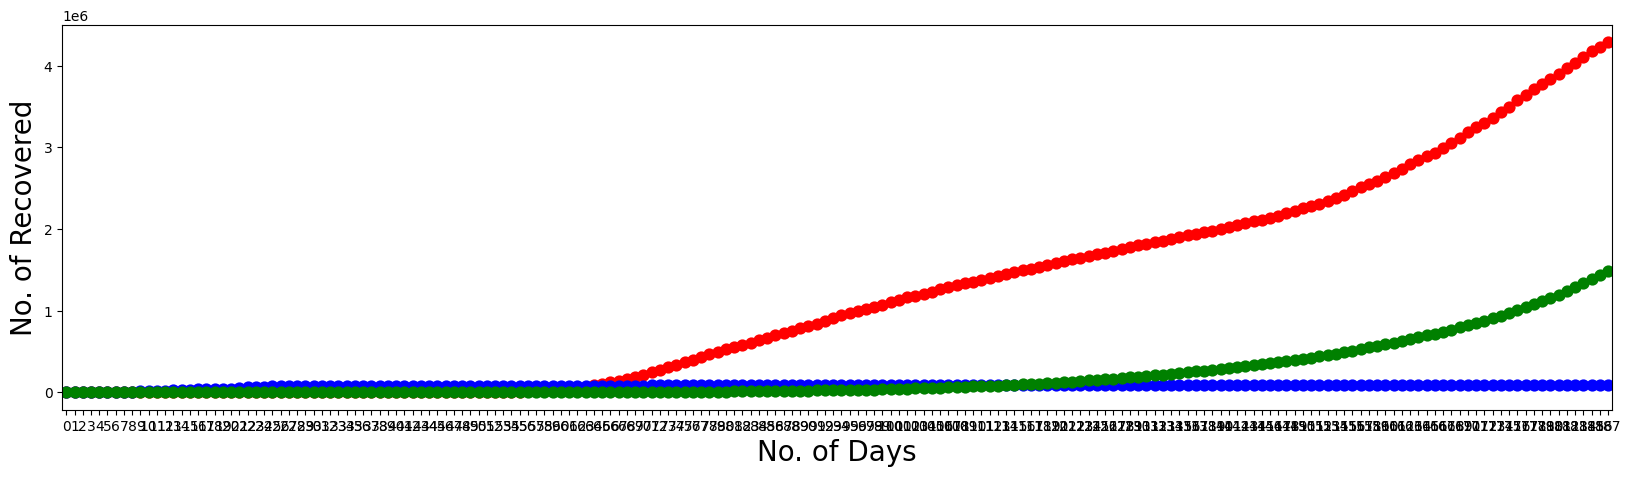

In [ ]:
# Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x=US.index, y = US.Confirmed, color = 'Red')
sns.pointplot(x=China.index, y=China.Confirmed, color = 'Blue')
sns.pointplot(x=India.index, y=India.Confirmed, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

# Model Building

In [ ]:
# Intalling prophet
!pip install prophet

'''
Prophet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range
of time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes
important dates or events that can impact the forecast.
'''

'\nProphet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range\nof time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes\nimportant dates or events that can impact the forecast.\n'

In [ ]:
# Reading dataset
df1 = pd.read_csv('/content/Covid_19_Clean_Complete.csv', parse_dates=['Date'])
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# Checking info of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
# creating new dataset of Confirmed cases
confirmed = df1.groupby(by='Date').sum()['Confirmed'].reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
# creating new dataset of Deaths cases
deaths = df1.groupby(by='Date').sum()['Deaths'].reset_index()
deaths.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [ ]:
# creating new dataset of Recovered cases
recovered = df1.groupby(by='Date').sum()['Recovered'].reset_index()
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [ ]:
# creating new dataset of Active cases
active = df1.groupby(by='Date').sum()['Active'].reset_index()
active.head()

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


# Forecasting for confirmed cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
# importing prophet library
from prophet import Prophet
m = Prophet()

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5uod_idu/g_p2amud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5uod_idu/x0hry4rs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78668', 'data', 'file=/tmp/tmp5uod_idu/g_p2amud.json', 'init=/tmp/tmp5uod_idu/x0hry4rs.json', 'output', 'file=/tmp/tmp5uod_idu/prophet_model2asodwbw/prophet_model-20241202160803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making prediction for next 7 month
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.291137e+05,7.751383e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.060978e+05,9.618306e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.896994e+04,1.072612e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.840211e+04,1.201960e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.549676e+04,1.069908e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663434e+07,1.685129e+07,1.674037e+07,1.675039e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685030e+07,1.706723e+07,1.693922e+07,1.696041e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705761e+07,1.727635e+07,1.713554e+07,1.717243e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724805e+07,1.747144e+07,1.732827e+07,1.738756e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


**Columns in the Output**

ds:

The timestamps for which predictions are made (from the input DataFrame or future DataFrame).

yhat:

The predicted value (forecasted output) for the corresponding date in ds.

yhat_lower and yhat_upper:

The lower and upper bounds of the uncertainty interval for the forecast. These values are derived from the model’s uncertainty settings and provide a confidence interval.

trend:

The estimated trend component of the forecast, capturing long-term movement.

trend_lower and trend_upper:

The lower and upper bounds for the uncertainty interval of the trend component.

seasonal:

The aggregated seasonal component of the forecast (sum of all seasonalities like daily, weekly, yearly).

seasonal_lower and seasonal_upper:

The uncertainty intervals for the aggregated seasonal component.

seasonal_X (e.g., seasonal_weekly, seasonal_yearly, etc.):

These columns correspond to specific seasonal components if multiple seasonalities were specified during model setup.

additive_terms:

The sum of all additive components (e.g., trend, seasonal, extra regressors if applicable).

additive_terms_lower and additive_terms_upper:

Uncertainty intervals for the additive terms.

multiplicative_terms (if applicable):

The sum of all multiplicative components, used when the model is set to multiplicative seasonality.

multiplicative_terms_lower and multiplicative_terms_upper:

Uncertainty intervals for the multiplicative terms.



**How to Use the Output**


Forecast Plotting:

 Use ds and yhat to plot the main forecast, while yhat_lower and yhat_upper are used for confidence intervals.

Component Analysis:

 Analyze the contributions of trend, seasonal, and other components (e.g., extra regressors) to the forecast.


In [ ]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.067684e+04,8.287702e+04,-1.230623e+05
1,2020-01-23,-8.050948e+03,1.024932e+05,-1.159612e+05
2,2020-01-24,5.827455e+03,1.146562e+05,-9.819989e+04
3,2020-01-25,1.217668e+04,1.157340e+05,-8.517287e+04
4,2020-01-26,8.405020e+03,1.117541e+05,-1.087521e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.684926e+07,1.663597e+07
191,2020-07-31,1.695910e+07,1.707203e+07,1.685463e+07
192,2020-08-01,1.716676e+07,1.727758e+07,1.706229e+07
193,2020-08-02,1.736430e+07,1.747985e+07,1.724670e+07


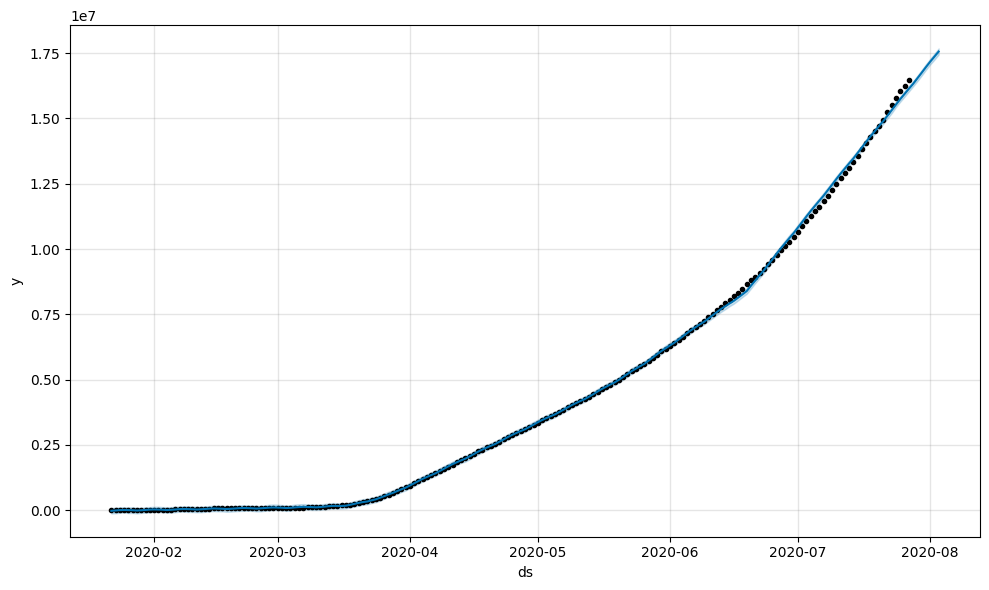

In [ ]:
# Visualizing
m.plot(forecast)
plt.show()

In [ ]:
# Importing plotly library
import plotly
import plotly.express as px

In [ ]:
world = df1.groupby(by='Country/Region')[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
world

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [ ]:
# visualizing using plotly library
figure = px.choropleth(world,locations='Country/Region',
                        locationmode = 'country names',
                        color='Active',
                        hover_name='Country/Region', range_color=[1,20000],
                        color_continuous_scale='reds',
                        title='Countries with Active Cases')
figure.show()

# **The End**